# Australian Energy Market Analysis

This notebook analyzes historical energy data from Australia, focusing on energy consumption patterns, energy mix changes, and the relationship between energy use and economic indicators. We'll explore how Australia's energy landscape has evolved over time, with particular attention to the transition between renewable and non-renewable energy sources.

The analysis uses two primary datasets:
- `aus_energy_table_b.xlsx`: Contains data on energy types and consumption
- `aus_energy_table_c.xlsx`: Contains demographic and economic indicators

In [40]:
# begin with some imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Data Loading and Preparation

We'll begin by importing necessary libraries and loading our datasets to explore Australia's energy landscape.

In [41]:
# load data -- this analysis will look only at australia-wide data, no state specific info
data_energy_demographics = pd.read_excel('aus_energy_table_b.xlsx', sheet_name='AUS', skiprows=4, header=None)
data_energy_type = pd.read_excel('aus_energy_table_c.xlsx', sheet_name='AUS', skiprows=4, header=None)

# let's view the data first
display(data_energy_demographics.head(3))
display(data_energy_type.head(3))

,0,1,2,3,4,5,6,7
0,NaN,NaN,Coal,Oil,Gas,Renewables,Statistical Discrepancy b,Total
1,NaN,NaN,PJ,PJ,PJ,PJ,PJ,PJ
2,NaN,1960-61,na,510,0,189.1,na,1336.6


,0,1,2,3,4,5,6,7
0,NaN,NaN,Population,GDP,Energy consumption,Energy consumption per capita,Energy intensity,Energy productivity
1,NaN,NaN,Number,$ million,PJ,GJ/person,GJ/$ million,$ million/PJ
2,NaN,1960-61,10548267,308362,1336.6,126.713,4334.516,230.706


In [42]:
# header row was split into two rows, so we need to combine them
df1 = data_energy_demographics.copy()
df2 = data_energy_type.copy()

# Create column names by combining name row and unit row
columns1 = df1.iloc[0].astype(str) + " (" + df1.iloc[1].astype(str) + ")"
columns2 = df2.iloc[0].astype(str) + " (" + df2.iloc[1].astype(str) + ")"

# Slice the actual data (from row index 2 onward)
df1 = df1.iloc[2:].copy()
df2 = df2.iloc[2:].copy()

# Apply cleaned column names
df1.columns = columns1
df2.columns = columns2

# Replace first column with the year values
df1.insert(0, 'Year', years1)
df2.insert(0, 'Year', years2)

# Set Year as index
df1.set_index('Year', inplace=True)
df2.set_index('Year', inplace=True)

# drop the first two columns
df1.drop(df1.columns[0:2], axis=1, inplace=True)
df2.drop(df2.columns[0:2], axis=1, inplace=True)


### Data Cleaning

The raw datasets require some preprocessing before analysis:
1. Combining split headers to create meaningful column names
2. Converting data types to numeric values
3. Setting the year as the index for time-series analysis
4. Removing unnecessary columns and rows

In [62]:
# display the cleaned data
display(df1.head(3))
display(df2.head(3))

# look at the data types
print(df1.info())
print(df2.info())

# data looks great, but we need to convert the columns to numeric types
df1 = df1.apply(pd.to_numeric, errors='coerce').round(1)
df2 = df2.apply(pd.to_numeric, errors='coerce').round(1)

# Set pandas display format to show only 1 decimal place
pd.set_option('display.float_format', '{:.1f}'.format)


,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Statistical Discrepancy b (PJ),Total (PJ)
Year,,,,,,
1961-62,NaN,510.0,0.0,189.1,NaN,1336.6
1962-63,NaN,537.3,0.0,185.6,NaN,1365.8
1963-64,NaN,581.9,0.1,194.6,NaN,1432.2


,Population (Number),GDP ($ million),Energy consumption (PJ),Energy consumption per capita (GJ/person),Energy intensity (GJ/$ million),Energy productivity ($ million/PJ)
Year,,,,,,
1961-62,10548267.0,308362.0,1336.6,126.7,4334.5,230.7
1962-63,10742291.0,312353.0,1365.8,127.1,4372.6,228.7
1963-64,10950379.0,331770.0,1432.2,130.8,4316.8,231.7


<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 1961-62 to nan
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Coal (PJ)                       50 non-null     float64
 1   Oil (PJ)                        63 non-null     float64
 2   Gas (PJ)                        63 non-null     float64
 3   Renewables (PJ)                 63 non-null     float64
 4   Statistical Discrepancy b (PJ)  50 non-null     float64
 5   Total (PJ)                      63 non-null     float64
dtypes: float64(6)
memory usage: 3.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 1961-62 to nan
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Population (Number)                        63 non-null     float64
 1   GDP ($ million)                      

In [70]:
# let's check the data again, something is fishy at the end
display(df1.tail(10))
display(df2.tail(10))

,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Statistical Discrepancy b (PJ),Total (PJ)
Year,,,,,,
2007-08,2316.6,1988.3,1131.9,226.2,60.9,5724.0
2008-09,2300.2,1984.1,1168.7,231.4,53.9,5738.3
2009-10,2351.0,2000.7,1252.9,239.9,-0.3,5844.2
2010-11,2224.8,2058.0,1257.8,282.6,0.6,5823.8
2011-12,2123.9,2212.0,1274.2,294.6,-1.8,5902.9
2012-13,2074.7,2184.2,1338.5,293.8,-2.8,5888.4
2013-14,1930.9,2278.0,1376.5,333.5,-2.1,5916.7
2014-15,1845.8,2297.2,1383.8,344.2,0.0,5871.0
2015-16,1907.2,2236.6,1407.0,347.7,-0.0,5898.4


,Population (Number),GDP ($ million),Energy consumption (PJ),Energy consumption per capita (GJ/person),Energy intensity (GJ/$ million),Energy productivity ($ million/PJ)
Year,,,,,,
2007-08,20827622.0,1609379.0,5724.0,274.8,3556.6,281.2
2008-09,21249199.0,1667095.0,5738.3,270.0,3442.1,290.5
2009-10,21691653.0,1698646.0,5844.2,269.4,3440.5,290.7
2010-11,22031750.0,1736467.0,5823.8,264.3,3353.8,298.2
2011-12,22340024.0,1778298.0,5902.9,264.2,3319.4,301.3
2012-13,22733465.0,1847979.0,5888.4,259.0,3186.4,313.8
2013-14,23128129.0,1896141.0,5916.7,255.8,3120.4,320.5
2014-15,23475686.0,1945581.0,5871.0,250.1,3017.6,331.4
2015-16,23815995.0,1988419.0,5898.4,247.7,2966.4,337.1


In [69]:
# great, let's drop the last 6 rows, they are not needed
df1 = df1.iloc[:-6]
df2 = df2.iloc[:-6]

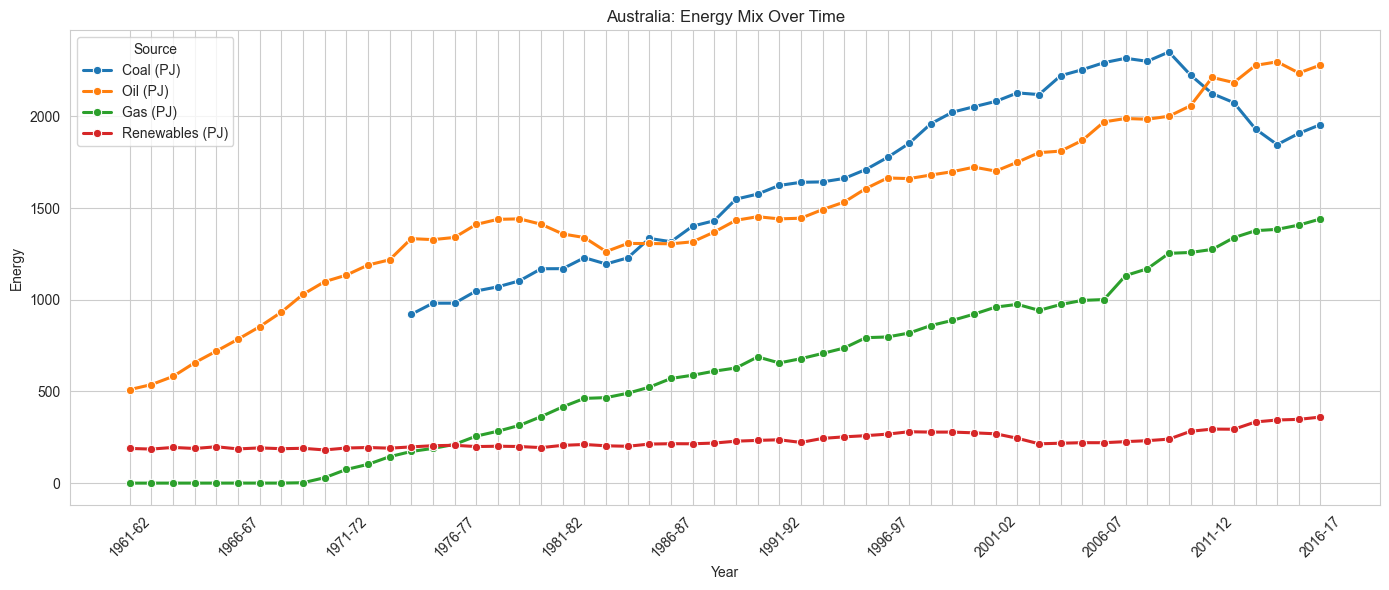

In [75]:
sources = ['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']
df_plot = df1[sources].astype(float).reset_index()
df_plot['Year'] = df_plot['Year'].astype(str)

# Melt to long format
df_melt = df_plot.melt(id_vars='Year', var_name='Source', value_name='Energy')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_melt, x='Year', y='Energy', hue='Source', marker='o', linewidth=2.2)
plt.title('Australia: Energy Mix Over Time')

# Show only every 5th x-axis label
years = df_plot['Year']
every_fifth = [label if i % 5 == 0 else '' for i, label in enumerate(years.unique())]
plt.xticks(ticks=range(len(years.unique())), labels=every_fifth, rotation=45)

plt.tight_layout()
plt.show()

## Energy Mix Analysis

This visualization shows how Australia's energy mix has evolved over time across four major sources: coal, oil, gas, and renewables. This helps us understand shifting dependencies and energy transitions in the Australian market.

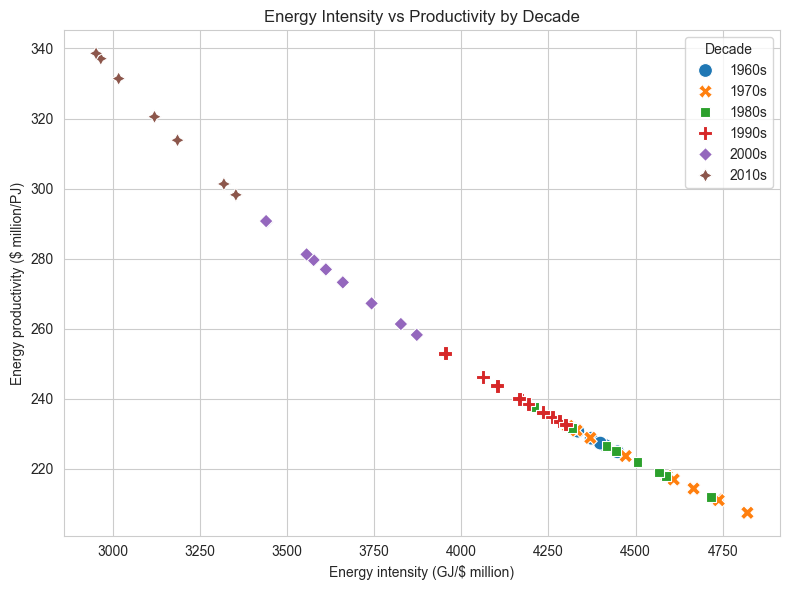

In [76]:
df_plot = df2[['Energy intensity (GJ/$ million)', 'Energy productivity ($ million/PJ)']].astype(float).reset_index()
df_plot['Decade'] = df_plot['Year'].str[:3] + '0s'

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, 
                x='Energy intensity (GJ/$ million)', 
                y='Energy productivity ($ million/PJ)', 
                hue='Decade', style='Decade', s=100)
plt.title('Energy Intensity vs Productivity by Decade')
plt.tight_layout()
plt.show()


## Energy Intensity vs Productivity Analysis

This scatter plot examines the relationship between energy intensity (energy consumption per dollar of GDP) and energy productivity (economic output per unit of energy) by decade. This visualization reveals how Australia's energy efficiency has changed over time - declining energy intensity coupled with increasing productivity indicates a more energy-efficient economy.

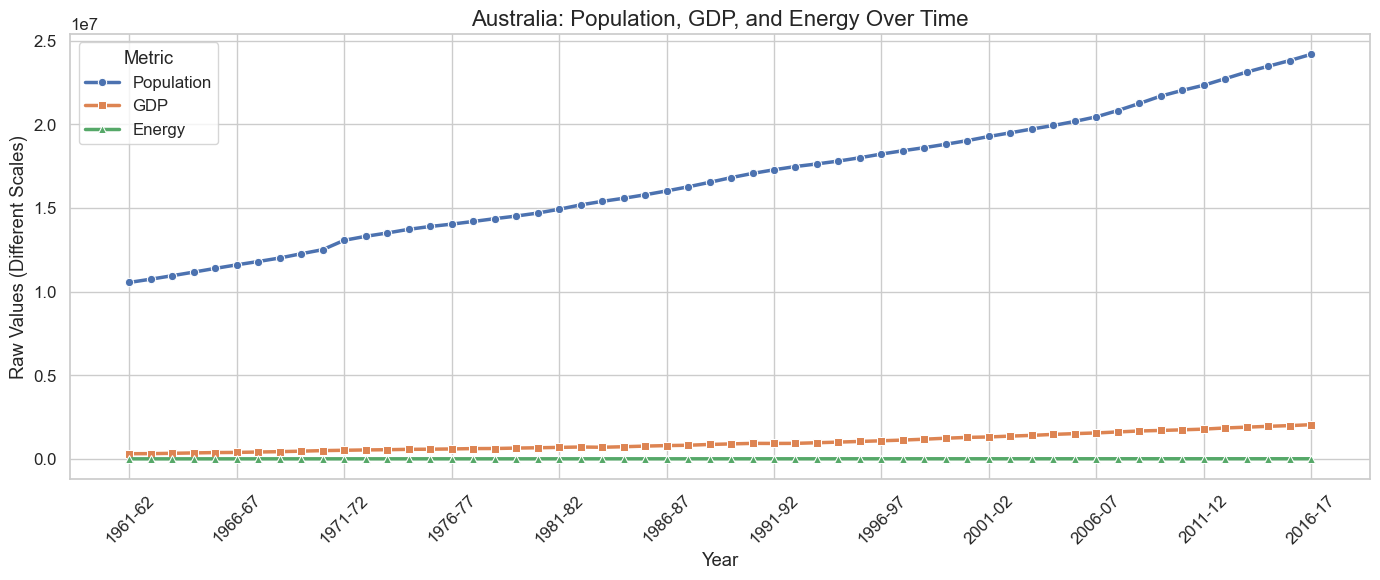

In [85]:
sns.set_theme(style="whitegrid", font_scale=1.1)

df = df2.reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Year', y='Population (Number)', label='Population', linewidth=2.5, marker='o')
sns.lineplot(data=df, x='Year', y='GDP ($ million)', label='GDP', linewidth=2.5, marker='s')
sns.lineplot(data=df, x='Year', y='Energy consumption (PJ)', label='Energy', linewidth=2.5, marker='^')

# Ticks every 5 years for clarity
tick_positions = df.index[::5]
tick_labels = df['Year'].iloc[::5]
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)

# Labels & legend
plt.title("Australia: Population, GDP, and Energy Over Time", fontsize=16)
plt.ylabel("Raw Values (Different Scales)")
plt.xlabel("Year")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


## Population, GDP, and Energy Consumption Trends

This visualization compares three key metrics over time: population growth, GDP growth, and energy consumption. While displayed on different scales, the relative rates of change help us understand whether Australia's economic growth and population increases have corresponded with proportional increases in energy usage.

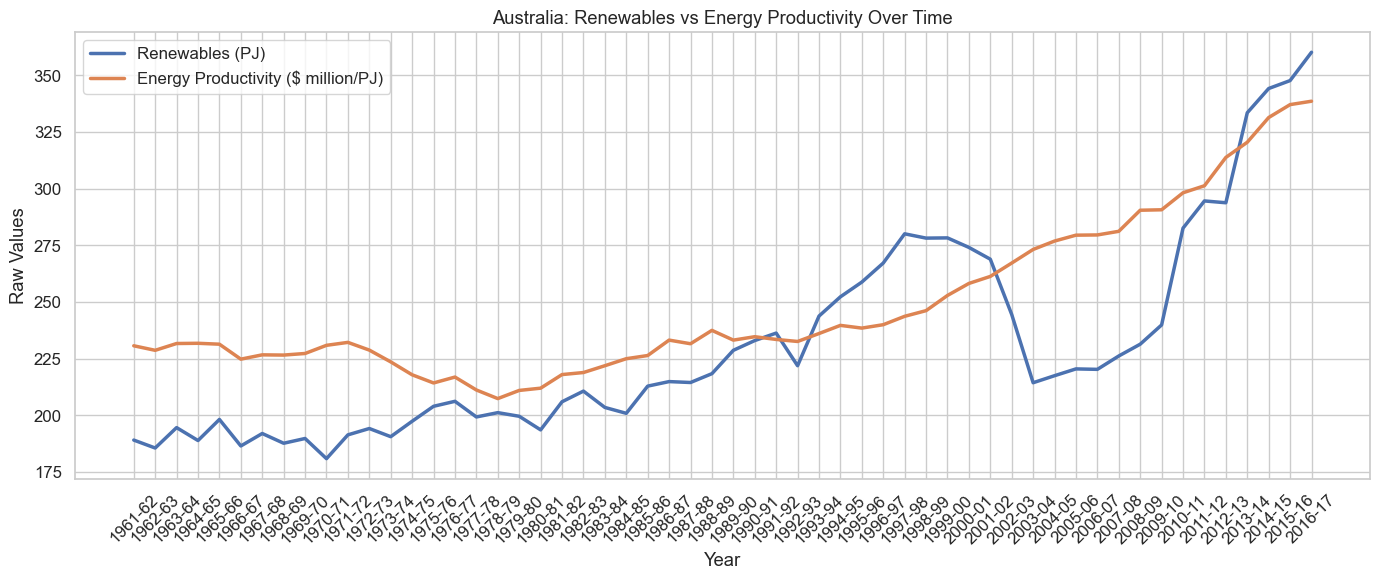

In [110]:
df = df2.reset_index()
df['Renewables'] = df1['Renewables (PJ)'].values
df['Productivity'] = df['Energy productivity ($ million/PJ)']

plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Year', y='Renewables', label='Renewables (PJ)', linewidth=2.5)
sns.lineplot(data=df, x='Year', y='Productivity', label='Energy Productivity ($ million/PJ)', linewidth=2.5)


plt.title("Australia: Renewables vs Energy Productivity Over Time")
plt.xticks(rotation=45)
plt.ylabel("Raw Values")
plt.legend()
plt.tight_layout()
plt.show()


## Renewable Energy and Economic Productivity

This analysis explores the relationship between renewable energy adoption and economic productivity. We examine whether increases in renewable energy usage correlate with changes in economic output per unit of energy consumed.

In [107]:
# Make a copy to work with
df_energy = df1.copy()

# Calculate Non-Renewables
df_energy['Non-Renewables (PJ)'] = (
    df_energy['Coal (PJ)'].astype(float).fillna(0) +
    df_energy['Oil (PJ)'].astype(float).fillna(0) +
    df_energy['Gas (PJ)'].astype(float).fillna(0)
)

# Create new frame with just Year, Renewables, and Non-Renewables
df_clean = df_energy[['Renewables (PJ)', 'Non-Renewables (PJ)']].copy()
df_clean.index.name = 'Year'

# Show result
display(df_clean.head())


,Renewables (PJ),Non-Renewables (PJ)
Year,,
1961-62,189.1,510.0
1962-63,185.6,537.3
1963-64,194.6,582.0
1964-65,188.9,656.9
1965-66,198.2,720.0


## Renewable vs Non-Renewable Energy

In this section, we aggregate fossil fuel sources (coal, oil, and gas) into a single 'Non-Renewables' category to compare against renewable energy sources. This allows us to see the broader transition in Australia's energy mix.

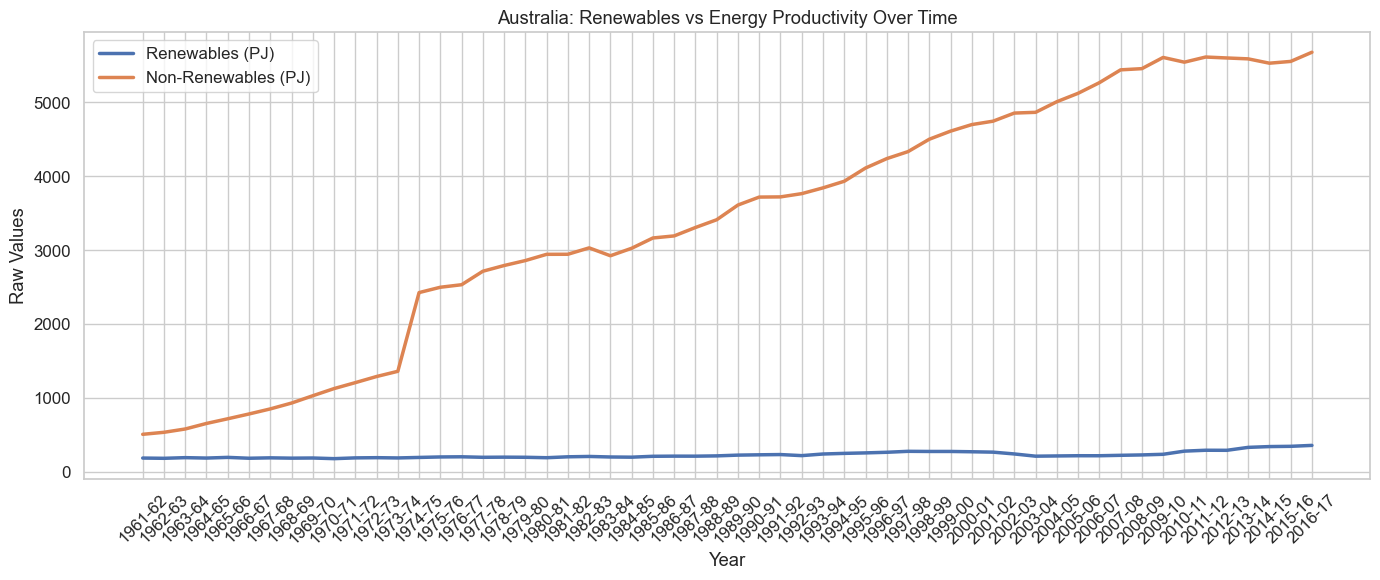

In [ ]:
df = df2.reset_index()
df['Renewables'] = df_clean['Renewables (PJ)'].values
df['Non-Renewables'] = df_clean['Non-Renewables (PJ)'].values

plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Year', y='Renewables', label='Renewables (PJ)', linewidth=2.5)
sns.lineplot(data=df, x='Year', y='Non-Renewables', label='Non-Renewables (PJ)', linewidth=2.5)


plt.title("Australia: Renewables vs Non-Renewables Over Time")
plt.xticks(rotation=45)
plt.ylabel("Energy (PJ)")
plt.legend()
plt.tight_layout()
plt.show()


## Summary of Findings

This analysis of Australia's energy market reveals several key insights:

### Energy Mix Transformation
- **Coal, Oil, and Gas**: Traditional fossil fuels have dominated Australia's energy mix historically, with coal showing a relatively stable trend until recent years when it began declining.
- **Renewable Energy**: There has been a clear upward trajectory in renewable energy adoption, particularly accelerating in recent years, though still representing a smaller portion of the overall energy mix compared to non-renewables.

### Economic and Energy Efficiency
- **Energy Intensity and Productivity**: The analysis shows a clear improvement in Australia's energy efficiency over time, with energy intensity decreasing and productivity increasing across decades.
- **Economic Decoupling**: Australia has increasingly decoupled economic growth from energy consumption, as shown by GDP growing more rapidly than energy use in recent decades.

### Social and Economic Factors
- **Population and Energy**: While population has grown steadily, energy consumption has not increased at the same rate, suggesting improvements in per-capita energy efficiency.
- **GDP Growth**: Economic output has grown significantly faster than both population and energy use, indicating substantial improvements in the economic value generated per unit of energy.

### Sustainability Transition
- **Renewable Energy Growth**: The renewable energy sector shows consistent growth, particularly accelerating in recent periods.
- **Fossil Fuel Dependency**: Despite renewable growth, Australia maintains significant dependency on non-renewable sources, highlighting both progress made and challenges ahead in energy transition.

These findings demonstrate Australia's gradual but definite shift toward a more energy-efficient and increasingly renewable-powered economy, though significant further transition is still needed to reduce dependency on fossil fuels.